# Importing 

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix


In [2]:
app = pd.read_csv(r'application_record.csv')

rec = pd.read_csv(r'credit_record.csv')

In [3]:
def data_info(data):
    cols = []
    unique = []
    n_uniques = []
    dtypes = []
    nulls = []
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({'Col' : cols , 'n_uniques' : n_uniques , 
                         'unique' :unique , 'dtypes' : dtypes , "NULLS" : nulls 
                        })

In [4]:
data_info(app)

,Col,n_uniques,unique,dtypes,NULLS
0,ID,438510,"[5008804, 5008805, 5008806, 5008808, 5008809, ...",int64,0
1,CODE_GENDER,2,"[M, F]",object,0
2,FLAG_OWN_CAR,2,"[Y, N]",object,0
3,FLAG_OWN_REALTY,2,"[Y, N]",object,0
4,CNT_CHILDREN,12,"[0, 1, 3, 2, 4, 5, 14, 19, 7, 9, 12, 6]",int64,0
5,AMT_INCOME_TOTAL,866,"[427500.0, 112500.0, 270000.0, 283500.0, 13500...",float64,0
6,NAME_INCOME_TYPE,5,"[Working, Commercial associate, Pensioner, Sta...",object,0
7,NAME_EDUCATION_TYPE,5,"[Higher education, Secondary / secondary speci...",object,0
8,NAME_FAMILY_STATUS,5,"[Civil marriage, Married, Single / not married...",object,0
9,NAME_HOUSING_TYPE,6,"[Rented apartment, House / apartment, Municipa...",object,0


In [5]:
data_info(rec)

,Col,n_uniques,unique,dtypes,NULLS
0,ID,45985,"[5001711, 5001712, 5001713, 5001714, 5001715, ...",int64,0
1,MONTHS_BALANCE,61,"[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...",int64,0
2,STATUS,8,"[X, 0, C, 1, 2, 3, 4, 5]",object,0


In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# 2.Data Preprocessing 

#### Check How Many times Customer ID become 1 or 0 

In [9]:
rec['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [10]:
rec['STATUS'].replace(['C' , 'X','0','1','2','3','4','5' ],[1,1,1,0,0,0,0,0], inplace=True)

final_result = rec.value_counts(subset=['ID' , 'STATUS']).unstack(fill_value=0)
final_result


STATUS,0,1
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [11]:
final_result['target'] = None 
final_result['target'][final_result[0] > 0] = 0

final_result['target'].unique()

array([None, 0], dtype=object)

In [12]:
final_result['target'].unique()

array([None, 0], dtype=object)

In [13]:
final_result['target'].fillna(1,inplace=True)

In [14]:
final_result

STATUS,0,1,target
ID,,,
5001711,0,4,1
5001712,0,19,1
5001713,0,22,1
5001714,0,15,1
5001715,0,60,1
...,...,...,...
5150482,0,18,1
5150483,0,18,1
5150484,0,13,1


In [15]:
new_target = pd.DataFrame(final_result['target'].astype(int))

In [16]:
data = app.merge(new_target , how = 'inner' , on = 'ID')

In [17]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0


### Check Missing Values


In [18]:
data.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
dtype: int64

In [19]:
data.fillna('other_type' , inplace=True)

In [20]:
data.set_index('ID' , inplace=True)

In [21]:
data.duplicated().sum()

25063

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11394 entries, 5008804 to 5150337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          11394 non-null  object 
 1   FLAG_OWN_CAR         11394 non-null  object 
 2   FLAG_OWN_REALTY      11394 non-null  object 
 3   CNT_CHILDREN         11394 non-null  int64  
 4   AMT_INCOME_TOTAL     11394 non-null  float64
 5   NAME_INCOME_TYPE     11394 non-null  object 
 6   NAME_EDUCATION_TYPE  11394 non-null  object 
 7   NAME_FAMILY_STATUS   11394 non-null  object 
 8   NAME_HOUSING_TYPE    11394 non-null  object 
 9   DAYS_BIRTH           11394 non-null  int64  
 10  DAYS_EMPLOYED        11394 non-null  int64  
 11  FLAG_MOBIL           11394 non-null  int64  
 12  FLAG_WORK_PHONE      11394 non-null  int64  
 13  FLAG_PHONE           11394 non-null  int64  
 14  FLAG_EMAIL           11394 non-null  int64  
 15  OCCUPATION_TYPE      11394 n

In [24]:
data.reset_index('ID' , inplace=True)

### 2.1Feature Generation  


###### 2.1.1.1 Total income for Person 

In [25]:

income_person= []
for i in data['AMT_INCOME_TOTAL'] :
    
    print(i)
    for j in data['CNT_FAM_MEMBERS']:
        
        print(j)
        
        
        z = i/j
        
        income_person.append(z)
        break


427500.0
2.0
112500.0
2.0
270000.0
2.0
283500.0
2.0
270000.0
2.0
135000.0
2.0
130500.0
2.0
157500.0
2.0
112500.0
2.0
270000.0
2.0
405000.0
2.0
112500.0
2.0
135000.0
2.0
211500.0
2.0
360000.0
2.0
126000.0
2.0
126000.0
2.0
315000.0
2.0
247500.0
2.0
297000.0
2.0
297000.0
2.0
157500.0
2.0
157500.0
2.0
135000.0
2.0
225000.0
2.0
135000.0
2.0
157500.0
2.0
157500.0
2.0
112500.0
2.0
112500.0
2.0
112500.0
2.0
270000.0
2.0
270000.0
2.0
157500.0
2.0
166500.0
2.0
216000.0
2.0
270000.0
2.0
225000.0
2.0
225000.0
2.0
315000.0
2.0
255150.0
2.0
157500.0
2.0
148500.0
2.0
148500.0
2.0
202500.0
2.0
202500.0
2.0
202500.0
2.0
112500.0
2.0
94500.0
2.0
315000.0
2.0
270000.0
2.0
450000.0
2.0
180000.0
2.0
112500.0
2.0
112500.0
2.0
90000.0
2.0
202500.0
2.0
247500.0
2.0
765000.0
2.0
765000.0
2.0
270000.0
2.0
315000.0
2.0
157500.0
2.0
360000.0
2.0
112500.0
2.0
157500.0
2.0
382500.0
2.0
382500.0
2.0
135000.0
2.0
225000.0
2.0
225000.0
2.0
315000.0
2.0
315000.0
2.0
180000.0
2.0
180000.0
2.0
157500.0
2.0
144000.0
2.0
2

In [26]:
len(income_person)

11394

In [27]:

income_per = pd.DataFrame(income_person , columns=['Person_income']) 
income_per.set_index(data['ID'] , inplace=True)

income_per

,Person_income
ID,
5008804,213750.0
5008806,56250.0
5008808,135000.0
5008812,141750.0
5008815,135000.0
...,...
5149729,45000.0
5149775,65250.0
5149828,157500.0


###### 2.1.1.2 How many year & Months our Customer work ?


In [28]:
month_employe = []
year_employe= []
for i in data['DAYS_EMPLOYED']:
    z = i/30
    month_employe.append(z)
    y = round((z / 12),2)
    year_employe.append(y)
len(year_employe)

11394

In [29]:
employee_month = pd.DataFrame( month_employe,columns=['employee_Month'] ).abs()
employee_year = pd.DataFrame(year_employe , columns=['employee_year']).abs()

employee_year.set_index(data['ID'] , inplace=True)
employee_month.set_index(data['ID'] , inplace=True)

In [30]:
employee_month , employee_year

(         employee_Month
 ID                     
 5008804      151.400000
 5008806       37.800000
 5008808      101.700000
 5008812    12174.766667
 5008815       25.633333
 ...                 ...
 5149729       57.366667
 5149775      313.033333
 5149828       80.666667
 5149838       44.166667
 5150337       39.766667
 
 [11394 rows x 1 columns],
          employee_year
 ID                    
 5008804          12.62
 5008806           3.15
 5008808           8.47
 5008812        1014.56
 5008815           2.14
 ...                ...
 5149729           4.78
 5149775          26.09
 5149828           6.72
 5149838           3.68
 5150337           3.31
 
 [11394 rows x 1 columns])

###### 2.1.1.3 Age of the customer 


In [31]:
age = []
for i in data['DAYS_BIRTH']:
    z = i/30
    y = round(z/12 , 3)
    age.append(y)
    
len(age)

11394

In [32]:
age_ = pd.DataFrame(age , columns=['Age']) 
age_.set_index(data['ID'] , inplace=True)

age_ = age_.agg(abs)
age_

,Age
ID,
5008804,33.347
5008806,59.650
5008808,53.083
5008812,62.400
5008815,46.867
...,...
5149729,53.058
5149775,44.825
5149828,48.189


###### Merging new Features in application csv file 


In [33]:
data = data.merge(income_per , how = 'inner' , on = 'ID')
data = data.merge(employee_month , how = 'inner' , on = 'ID')
data = data.merge(employee_year , how = 'inner' , on = 'ID')
data = data.merge(age_ , how = 'inner' , on = 'ID')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Person_income,employee_Month,employee_year,Age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other_type,2.0,0,213750.0,151.400000,12.62,33.347
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,1,56250.0,37.800000,3.15,59.650
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,1,135000.0,101.700000,8.47,53.083
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,other_type,1.0,1,141750.0,12174.766667,1014.56,62.400
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,1,135000.0,25.633333,2.14,46.867


I found Number of years bigger than 60 year so we will custome that 

In [34]:
sel = data.iloc[data['employee_year'][data['employee_year'] >60]].index

In [35]:
data.drop(sel , axis = 0 , inplace=True)

In [36]:
data.drop(3 , axis = 0 , inplace=True)

In [37]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Person_income,employee_Month,employee_year,Age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other_type,2.0,0,213750.0,151.400000,12.62,33.347
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,1,56250.0,37.800000,3.15,59.650
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,1,135000.0,101.700000,8.47,53.083
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,1,135000.0,25.633333,2.14,46.867
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,2.0,1,67500.0,39.800000,3.32,49.383


### 2.1.2 Credit Record Csv file

###### 2.1.2.1 Account Length

In [38]:
account_len=pd.DataFrame(rec.groupby('ID')['MONTHS_BALANCE'].agg(['max']))
account_len=account_len.agg(abs)
                         
account_len

,max
ID,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,11
5150483,0
5150484,0


###### 2.1.2.2 Starting Month

In [39]:
account_start=pd.DataFrame(rec.groupby('ID')['MONTHS_BALANCE'].agg(['min']))
account_start=account_start.agg(abs)
account_start

,min
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59
...,...
5150482,28
5150483,17
5150484,12


###### 2.1.2.5 How many Months customer pay the loan and not pay the loan ?


In [40]:
rec.value_counts(subset=['ID' , 'MONTHS_BALANCE']).unstack(fill_value=0)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
5001712,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5001713,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5001714,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5001715,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5150483,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5150484,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [41]:
# No. of months pay a loan and no. of months don't pay a loan 

fea_new = rec.groupby('ID').agg(sum)
pay= pd.DataFrame(fea_new['STATUS'] )


In [42]:
pay

,STATUS
ID,
5001711,4
5001712,19
5001713,22
5001714,15
5001715,60
...,...
5150482,18
5150483,18
5150484,13


In [43]:
all_months = pd.DataFrame(rec.groupby('ID')['MONTHS_BALANCE'].count())
all_months.reset_index('ID' , inplace=True)

In [44]:
not_pay = []
for i in all_months['MONTHS_BALANCE']: 
    for j in pay['STATUS']:
        z = i-j
        not_pay.append(z)
        break


In [45]:
not_pay_ = pd.DataFrame(not_pay , columns=['Notpaying_loan']) 
not_pay_.set_index(all_months['ID'] , inplace=True)
not_pay_

,Notpaying_loan
ID,
5001711,0
5001712,15
5001713,18
5001714,11
5001715,56
...,...
5150482,14
5150483,14
5150484,9


In [46]:
data = data.merge(not_pay_ , how = 'inner' , on = 'ID')
data = data.merge(pay , how = 'inner' , on='ID')
data = data.merge(account_len , how = 'inner' , on='ID')
data = data.merge(account_start , how = 'inner' , on='ID')

In [47]:
data.rename(columns={'STATUS' : 'pay_loan' , 'max' : 'account_len' , 'min':'account_start' } , inplace=True)

In [48]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,target,Person_income,employee_Month,employee_year,Age,Notpaying_loan,pay_loan,account_len,account_start
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2.0,0,213750.0,151.400000,12.62,33.347,12,15,0,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2.0,1,56250.0,37.800000,3.15,59.650,26,30,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,1,135000.0,101.700000,8.47,53.083,1,5,0,4
3,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,2.0,1,135000.0,25.633333,2.14,46.867,2,6,0,5
4,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,2.0,1,67500.0,39.800000,3.32,49.383,4,8,10,17


data.rename(columns = {0:'year_employee'}, inplace = True)


### Check Outliers 

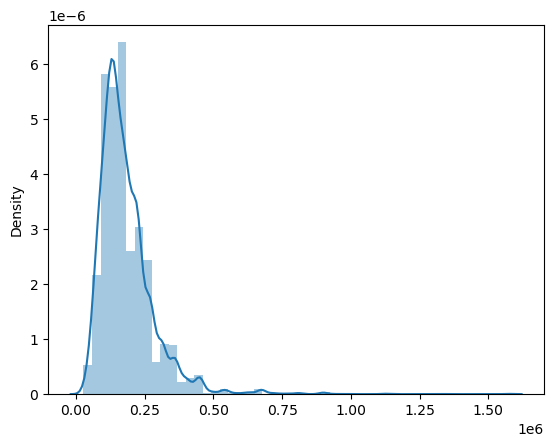

In [49]:
sns.distplot( x =data['AMT_INCOME_TOTAL']);

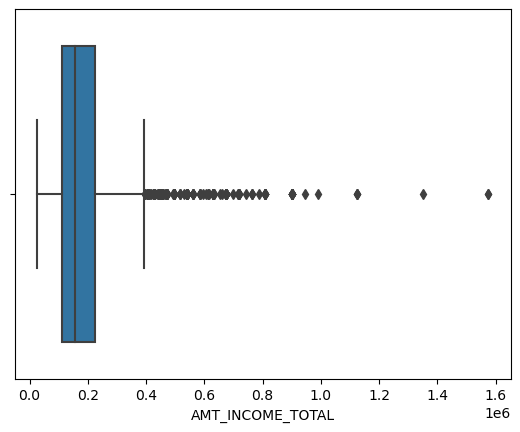

In [50]:
sns.boxplot(data['AMT_INCOME_TOTAL']);

In [51]:
# By Applying IQR theory because the distribution is SKewed 

q1 = data['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = data['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3 - q1 

upper_whisker = q3 + 1.5* iqr
lower_whisker = q1 - 1.5* iqr
if lower_whisker < 0 :
    lower_whisker = 0 
upper_whisker , lower_whisker

(393750.0, 0)

In [52]:
filt2 = data['AMT_INCOME_TOTAL'] >  upper_whisker 
filt3 = data['AMT_INCOME_TOTAL'] <  lower_whisker

out2 = data[filt2].index
out3 = data[filt3].index
data.drop(out3 , axis = 0 , inplace =True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11392 entries, 0 to 11391
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11392 non-null  int64  
 1   CODE_GENDER          11392 non-null  object 
 2   FLAG_OWN_CAR         11392 non-null  object 
 3   FLAG_OWN_REALTY      11392 non-null  object 
 4   CNT_CHILDREN         11392 non-null  int64  
 5   AMT_INCOME_TOTAL     11392 non-null  float64
 6   NAME_INCOME_TYPE     11392 non-null  object 
 7   NAME_EDUCATION_TYPE  11392 non-null  object 
 8   NAME_FAMILY_STATUS   11392 non-null  object 
 9   NAME_HOUSING_TYPE    11392 non-null  object 
 10  DAYS_BIRTH           11392 non-null  int64  
 11  DAYS_EMPLOYED        11392 non-null  int64  
 12  FLAG_MOBIL           11392 non-null  int64  
 13  FLAG_WORK_PHONE      11392 non-null  int64  
 14  FLAG_PHONE           11392 non-null  int64  
 15  FLAG_EMAIL           11392 non-null 

In [54]:
data.set_index('ID' , inplace=True)

In [55]:
data['target'].value_counts()

1    8988
0    2404
Name: target, dtype: int64

## Feature Scaling  

In [57]:
scl = StandardScaler()
data['AMT_INCOME_TOTAL'] = scl.fit_transform(np.array(data['AMT_INCOME_TOTAL']).reshape(-1, 1))
data['CNT_CHILDREN'] = scl.fit_transform(np.array(data['CNT_CHILDREN']).reshape(-1, 1))
data['DAYS_BIRTH'] = scl.fit_transform(np.array(data['DAYS_BIRTH']).reshape(-1, 1))
data['DAYS_EMPLOYED'] = scl.fit_transform(np.array(data['DAYS_EMPLOYED']).reshape(-1, 1))
data['CNT_FAM_MEMBERS'] = scl.fit_transform(np.array(data['CNT_FAM_MEMBERS']).reshape(-1, 1))
data['Person_income'] = scl.fit_transform(np.array(data['Person_income']).reshape(-1, 1))

data['employee_Month'] = scl.fit_transform(np.array(data['employee_Month']).reshape(-1, 1))
data['employee_year'] = scl.fit_transform(np.array(data['employee_year']).reshape(-1, 1))

data['Age'] = scl.fit_transform(np.array(data['Age']).reshape(-1, 1))
data['Notpaying_loan'] = scl.fit_transform(np.array(data['Notpaying_loan']).reshape(-1, 1))
data['pay_loan'] = scl.fit_transform(np.array(data['pay_loan']).reshape(-1, 1))

data['account_len'] = scl.fit_transform(np.array(data['account_len']).reshape(-1, 1))



## Encoding 

#### One Hot Encoding

In [58]:
data = pd.get_dummies(data,columns=['CODE_GENDER' , 'FLAG_OWN_CAR'
                                    , 'FLAG_OWN_REALTY' ])

#### Label Encoding

In [59]:

lb = LabelEncoder()
col = [ 'NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE' 
       , 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE' ,'OCCUPATION_TYPE' ] 
for i in col:

    data[i] = lb.fit_transform(data[i] )

# Splitting Data 

In [60]:

x = data.drop('target' , axis =1 )
y = data['target']

In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11392 entries, 5008804 to 5150337
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNT_CHILDREN         11392 non-null  float64
 1   AMT_INCOME_TOTAL     11392 non-null  float64
 2   NAME_INCOME_TYPE     11392 non-null  int64  
 3   NAME_EDUCATION_TYPE  11392 non-null  int64  
 4   NAME_FAMILY_STATUS   11392 non-null  int64  
 5   NAME_HOUSING_TYPE    11392 non-null  int64  
 6   DAYS_BIRTH           11392 non-null  float64
 7   DAYS_EMPLOYED        11392 non-null  float64
 8   FLAG_MOBIL           11392 non-null  int64  
 9   FLAG_WORK_PHONE      11392 non-null  int64  
 10  FLAG_PHONE           11392 non-null  int64  
 11  FLAG_EMAIL           11392 non-null  int64  
 12  OCCUPATION_TYPE      11392 non-null  int64  
 13  CNT_FAM_MEMBERS      11392 non-null  float64
 14  Person_income        11392 non-null  float64
 15  employee_Month       11392 n

## Feature Selection 

for Numerical Data we will use ANOVA as feature Selection

In [62]:
## from sklearn.feature_selection import SelectKBest

select = SelectKBest(f_classif , k = 15)

select_up = select.fit_transform(x,y)
select_feat = select.get_support()

p_value = np.round(select.pvalues_,4)
f_value = np.round(select.scores_,4)

select_inde = select.get_support(indices=True)
select_inde


array([ 1,  5,  6,  7, 11, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27])

In [63]:
x = data.iloc[:,select_inde]
y = data['target']


print('Selected Features : \n\n' , x.columns)

Selected Features : 

 Index(['AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_EMAIL', 'target', 'Person_income', 'employee_Month',
       'employee_year', 'Age', 'Notpaying_loan', 'pay_loan', 'account_len',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N'],
      dtype='object')


x = data.drop('target' , axis =1)
y = data['target']

In [64]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42 ,
                                                       shuffle=True , stratify=data['target'])

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(x_train, y_train)

In [65]:
tl = SMOTE()
X_res, y_res = tl.fit_resample(x_train, y_train)

from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res_2, y_res_2 = tl.fit_resample(X_res, y_res)

In [66]:
model = []
pre_train  = []
rec_train  = []
f1_train  = []
spe_train  = []
pre_test  = []
rec_test  = []
f1_test  = []
spe_test  = []


# KNN

In [67]:
knn5 = KNeighborsClassifier(n_neighbors = 6)
knn5.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=6)

In [68]:

y_pred = knn5.predict(X_res)

print(confusion_matrix(y_pred, y_res))

tn, fp, fn, tp = confusion_matrix(y_res, y_pred).ravel()

specificity_tra = round(tn / (tn+fp) , 4)
acc_tra=round(accuracy_score(y_pred,y_res),4)
rec_tra = round(recall_score(y_pred,y_res),4)
pre_tra= round(precision_score(y_pred,y_res),4)
f1_tra=round(f1_score(y_pred,y_res) , 4)
print("accuracy_score : " , acc_tra)
print("recall_score : " ,rec_tra)
print("precision_score : ",pre_tra)
print("f1_score : " ,f1_tra)
print("specificity :", specificity_tra)
model.append('KNN')
pre_train.append(pre_tra)
rec_train.append(rec_tra)
f1_train.append(f1_tra)
spe_train.append(specificity_tra)



[[6289   51]
 [   2 6240]]
accuracy_score :  0.9958
recall_score :  0.9997
precision_score :  0.9919
f1_score :  0.9958
specificity : 0.9997


In [69]:

y_pred = knn5.predict(x_test)

print(confusion_matrix(y_pred,y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

specificity_tes = round(tn / (tn+fp) , 4)
acc_tes=round(accuracy_score(y_pred,y_test) , 4)
rec_tes = round(recall_score(y_pred,y_test),4)
pre_tes= round(precision_score(y_pred,y_test) ,4)
f1_tes=round(f1_score(y_pred,y_test) , 4 )
print("accuracy_score : " , acc_tes)
print("recall_score : " ,rec_tes)
print("precision_score : ",pre_tes)
print("f1_score : " ,f1_tes)
print("specificity :", specificity_tes)

pre_test.append(pre_tes)
rec_test.append(rec_tes)
f1_test.append(f1_tes)
spe_test.append(specificity_tes)

[[ 700   38]
 [  21 2659]]
accuracy_score :  0.9827
recall_score :  0.9922
precision_score :  0.9859
f1_score :  0.989
specificity : 0.9709


In [70]:
history = {'precision_score':[pre_train,pre_test] , 
          'recall_score' : [rec_train,rec_test] , 'f1_score' : [f1_train,f1_test]
          , 'specificity' : [spe_train,spe_test]}

classification_report = pd.DataFrame(history , index=['Train' , 'Test'])

In [71]:
classification_report

,precision_score,recall_score,f1_score,specificity
Train,[0.9919],[0.9997],[0.9958],[0.9997]
Test,[0.9859],[0.9922],[0.989],[0.9709]
